## Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_16533/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
def get_datos_metas(ruta):
    datos = pd.read_csv(ruta)

    list_objs = [i.strip() for i in list(datos['Pendientes'])]
    list_requisito = list(datos['Requisito'].fillna(1))
    list_cumplido =  list(datos['Cumplido'].fillna(0))
    list_realizado = [i.strip() for i in list(datos['Realizado'])]
    
    return list_objs, list_requisito, list_cumplido, list_realizado 
    

In [3]:
datos = pd.read_csv('/home/gresuto/DS/Proyectos/Diamond Analyzer/data/data_sprintHI.csv')
datos



,Realizado,Pendientes,Procedencia,Requisito,Cumplido,Fecha
0,No,Lograr 1 venta o contribución,Libertad Financiera,1.0,NaN,26 de enero de 2024
1,No,Empezar progresión de L-sit,Salud Extrema,NaN,NaN,26 de enero de 2024
2,Yes,Realizar 3 días de entrenamiento de rutinas,Salud Extrema,3.0,NaN,26 de enero de 2024
3,No,Realizar 3 entrenamientos de abdomen,Salud Extrema,3.0,NaN,26 de enero de 2024
4,Yes,Completar curso de EDA,DS Way,NaN,NaN,26 de enero de 2024
5,Yes,Completar curso de Fundamentos de Economía,DS Way,NaN,NaN,26 de enero de 2024
6,No,Cumplir con 20 horas de leveling,DS Way,20.0,7.0,26 de enero de 2024
7,No,Cumplir con 5 post en x o 5h,DS Way,5.0,0.0,26 de enero de 2024


In [1]:

""" 
Análisis a realizar:
Datos:

Hábito con mayor frecuencia
Hábito con menor frecuencia
Día con mayor frecuencia
Día con menor frecuencia
Hábito con mayor racha 

Porcentaje total de hábitos cumplidos

Visual:
Gráfica de frecuencia por dia
Gráfica de frecuencia total de habitos

"""

' \nAnálisis a realizar:\nDatos:\n\nHábito con mayor frecuencia\nHábito con menor frecuencia\nDía con mayor frecuencia\nDía con menor frecuencia\nHábito con mayor racha \nHábito con menor racha\nPorcentaje total de hábitos cumplidos\n\nVisual:\nGráfica de frecuencia por dia\nGráfica de frecuencia total de habitos\n\n'

In [2]:
data_habit_example = pd.read_csv(
    '/home/gresuto/DS/Proyectos/Diamond Analyzer/data/habitos_example.csv')
me_interesa_d = data_habit_example.drop(columns=['Progress', 'Status', 'Day']).iloc[len(
    data_habit_example)-12:len(data_habit_example)]
me_interesa = data_habit_example.drop(columns=['Date', 'Progress', 'Status', 'Day']).iloc[len(
    data_habit_example)-12:len(data_habit_example)]
me_interesa

,Anotar Gastos/Ingresos,Ejercitar Flexibilidad,Gestión de Diamantes,Hacer ejercicios de Mr Mandíbulas,Journal,Organizar Local,Practicar frente al espejo,Programar,Rutina Facial,Visualizar futuro,✍🏽Planificar,🍩🙅🏽‍♂️Sin azúcar,💤 Dormir Temprano,💦Tomar agua en el inicio del día,💪🏽Hacer Ejercicio,🔥Wake Up On Fire,🚿Café Helado,🛌🏽 Tender Cama al Levantarme,🤳🏽Socializar por Redes Sociales Digitales,🧘 Meditation
149,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
150,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
151,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
152,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
153,Yes,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No,No,Yes,Yes,No
154,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No
155,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
156,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No
157,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,No,No,Yes,No,No
158,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


### Frecuencia de habitos

In [33]:
#Habito mayor&menor frecuencia
frec_habit = me_interesa.eq('Yes').sum()
dict = frec_habit.to_dict()
habits_maxfrec = [i for i in list(dict.keys()) if dict[i] == frec_habit.max()]
habits_minfrec = [i for i in list(dict.keys()) if dict[i] == frec_habit.min()]

habits_maxfrec

habits_ordenados = frec_habit.sort_values()
habits_ordenados.values
habits_ordenados.index
' y '.join(habits_maxfrec)

'Programar y ✍🏽Planificar'

### Frecuencias por dia

In [4]:
#columns_to_drop = me_interesa.filter(like='Date').columns.tolist() + data_habit_example.filter(like='Day').columns.tolist()

new_name = me_interesa.transpose().reset_index()

new_name.columns = range(13)
frec_dia = new_name.eq('Yes').sum()

dict_d = frec_dia.to_dict()
days_maxfrec = [i for i in list(dict_d.keys()) if dict_d[i] == frec_dia.max()]
days_minfrec = [i for i in list(dict_d.keys()) if dict_d[i] == frec_dia.min()]

days_maxfrec
frec_dia[frec_dia.values != 0]
list(frec_dia[frec_dia.values != 0])
#new_name



[7, 2, 3, 5]

### Maximo dias consecutivos

In [5]:
def count_consecutive_yes(series):
    max_consecutive_yes = 0
    current_consecutive_yes = 0
    for value in series:
        if value == 'Yes':
            current_consecutive_yes += 1
            max_consecutive_yes = max(max_consecutive_yes, current_consecutive_yes)
        else:
            current_consecutive_yes = 0
    return max_consecutive_yes

consecutive_yes_count = me_interesa.apply(count_consecutive_yes)
consecutive_yes_count

dict_r = consecutive_yes_count.to_dict()
habits_maxrach = [i for i in list(dict_r.keys()) if dict_r[i] == consecutive_yes_count.max()]
habits_maxrach

['Programar', '✍🏽Planificar']

### Porcentaje total de habitos cumplidos

In [6]:
me_interesa.eq('Yes').sum().sum()
me_interesa.size
habits_porcent = me_interesa.eq('Yes').sum().sum() / me_interesa.size * 100
habits_porcent 

7.083333333333333

## Graficas

#### NOta:   Recordar que al tratar con los ejes, si se tratan como numeros van actuar como numeros y van a seguir un orden, para evitar esto hay que convertirlos a cadenas

/tmp/ipykernel_12229/2825121563.py:35: UserWarning: Glyph 129331 (\N{SELFIE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12229/2825121563.py:35: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12229/2825121563.py:35: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12229/2825121563.py:35: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12229/2825121563.py:35: UserWarning: Glyph 128716 (\N{SLEEPING ACCOMMODATION}) missing from current font.
  plt.tight_layout()


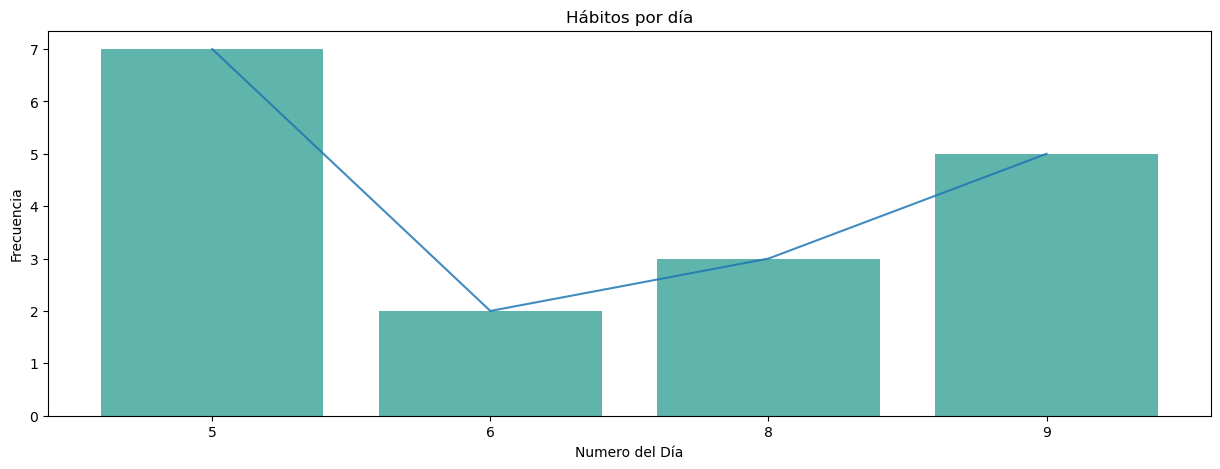

/home/gresuto/mambaforge/envs/Diamond_Analyzer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129331 (\N{SELFIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gresuto/mambaforge/envs/Diamond_Analyzer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gresuto/mambaforge/envs/Diamond_Analyzer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gresuto/mambaforge/envs/Diamond_Analyzer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gresuto/mambaforge/envs/Diamond_Analyzer/lib/python3.11/site-packages/IPython/co

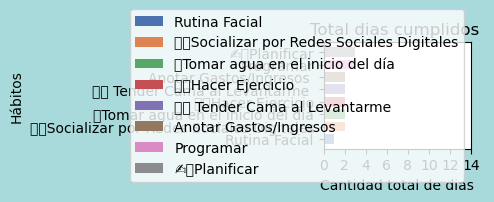

In [17]:
colors = sns.color_palette("deep")

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Filtrar los datos para excluir los días con contador 0
frec_dia_filtrado = frec_dia[frec_dia.values != 0]

# Convertir los índices en cadenas
frec_dia_filtrado.index = frec_dia_filtrado.index.astype(str)

# Graficar un gráfico de barras en el primer eje
ax.bar(frec_dia_filtrado.index, frec_dia_filtrado.values, alpha=0.75, color='#2a9d8f')
ax.set_title('Hábitos por día')
ax.set_xlabel('Numero del Día')
ax.set_ylabel('Frecuencia')

# Graficar un gráfico de líneas en el segundo eje
ax.plot(frec_dia_filtrado.index, frec_dia_filtrado.values, alpha=0.85)


 # Grafica 2
fig2, ax = plt.subplots(1, 1, figsize=(5, 2))
fig2.set_facecolor('#a8dadc')
frec_habit_filtrado = habits_ordenados[habits_ordenados.values != 0]
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
bars = ax.barh(frec_habit_filtrado.index, frec_habit_filtrado.values, color=colors )
ax.set_title('Total dias cumplidos ')
ax.set_xlabel('Cantidad total de dias')
ax.set_ylabel('Hábitos')
ax.set_xticks(range(0,16,2))

ax.legend(bars, frec_habit_filtrado.index, loc='right')

# Ajustar el diseño de las subtramas
plt.tight_layout()
plt.show()

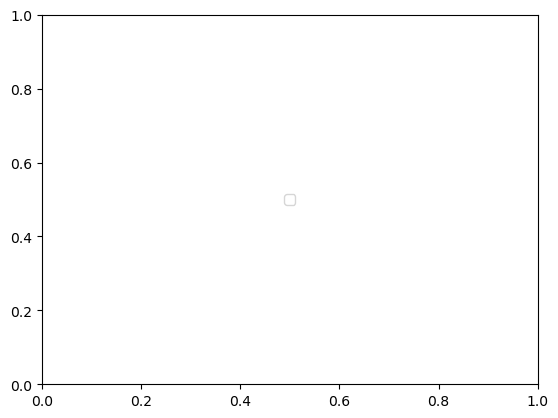

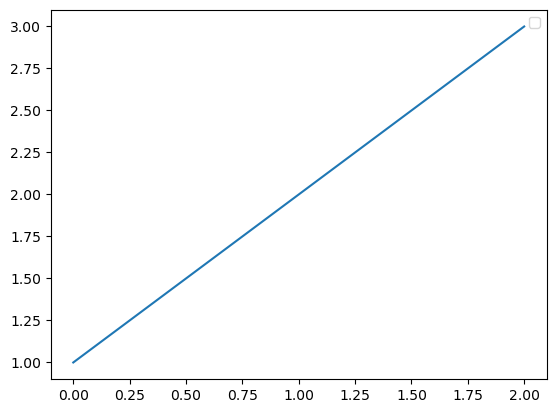

In [20]:
import matplotlib.pyplot as plt

# Crear una figura vacía
fig, ax = plt.subplots()

# Crear la leyenda y guardarla en una variable
legend = ax.legend(['Hábitos'], loc='center')

# Mostrar la figura
plt.show()

# Utilizar la leyenda en otro lienzo
fig2, ax2 = plt.subplots()
ax2.plot([1, 2, 3], label='Ejemplo')  # Ejemplo de crear un gráfico con etiqueta
ax2.legend(legend.get_lines(), [line.get_label() for line in legend.get_lines()])

# Mostrar el segundo lienzo
plt.show()